In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
from matplotlib import pyplot as plt 
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns


pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Wrangling:

In [2]:
df =pd.read_csv("Diwali Sales Data.csv",encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [3]:
df.duplicated().value_counts()

False    11243
True         8
Name: count, dtype: int64

In [4]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,"23,952.00",NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,"23,934.00",NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,"23,924.00",NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,"23,912.00",NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,"23,877.00",NaN,NaN


#### Issues:
- we need to rename columns
- we need to change type of Age column to object
- we need to drop null values columns and Cust_name
- we need to drop duplicates
- we need to drop Null values from Amount
- we need to change values to married and single at Marital_Status Column

### Cleaning:

In [6]:
# Rename Columns
df.rename(columns= lambda x: x.lower().replace(' ','_'),inplace =True )
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount', 'status', 'unnamed1'],
      dtype='object')

In [7]:
# Drop Null Columns
df=df[['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount']]


In [8]:
# Drop Cust Name Column
# df.drop(["cust_name"],axis=1, inplace=True,)

In [9]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Drop Null Values Rows from Amount Column
df["amount"] = df["amount"].dropna()

In [11]:
# Convert Age to Object Type
df["age"] = df["age"].astype("object")

In [12]:
# change values to married and single at Marital_Status Column 
df.marital_status[df['marital_status'] == 1] = 'Single'
df.marital_status[df['marital_status'] == 0] = 'Married'

C:\Users\mohamed.soliman\AppData\Local\Temp\ipykernel_21888\4136410257.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mohamed.soliman\AppData\Local\Temp\ipykernel_21888\4136410257.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [13]:
# change values to married and single at Marital_Status Column 
df.gender[df['gender'] == "F"] = 'Female'
df.gender[df['gender'] == "M"] = 'Male'

C:\Users\mohamed.soliman\AppData\Local\Temp\ipykernel_21888\3682242675.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\mohamed.soliman\AppData\Local\Temp\ipykernel_21888\3682242675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df.shape

(11243, 13)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"11,243.00","1,003,004.99","1,716.14","1,000,001.00","1,001,494.00","1,003,065.00","1,004,430.00","1,006,040.00"
orders,"11,243.00",2.49,1.11,1.00,1.00,2.00,3.00,4.00
amount,"11,231.00","9,454.08","5,221.73",188.00,"5,443.00","8,109.00","12,677.50","23,952.00"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11243 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11243 non-null  int64  
 1   cust_name         11243 non-null  object 
 2   product_id        11243 non-null  object 
 3   gender            11243 non-null  object 
 4   age_group         11243 non-null  object 
 5   age               11243 non-null  object 
 6   marital_status    11243 non-null  object 
 7   state             11243 non-null  object 
 8   zone              11243 non-null  object 
 9   occupation        11243 non-null  object 
 10  product_category  11243 non-null  object 
 11  orders            11243 non-null  int64  
 12  amount            11231 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [17]:
df.sample(5)

,user_id,cust_name,product_id,gender,age_group,age,marital_status,state,zone,occupation,product_category,orders,amount
9824,1005585,Mhatre,P00044442,Female,26-35,33,Single,Karnataka,Southern,Banking,Clothing & Apparel,2,"3,699.00"
10137,1004890,Cox,P00299142,Male,26-35,31,Married,Maharashtra,Western,Banking,Household items,3,"3,150.00"
6938,1002820,Arpita,P00021942,Male,36-45,41,Married,Uttar Pradesh,Central,Retail,Clothing & Apparel,3,"7,121.00"
7220,1001492,O'Connel,P00320742,Female,26-35,33,Single,Kerala,Southern,Banking,Clothing & Apparel,1,"7,023.00"
8723,1002544,Oshin,P00233642,Female,46-50,47,Married,Andhra Pradesh,Southern,Aviation,Clothing & Apparel,3,"5,307.00"


### Analysis:

#### Uni-Variate

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Mine\pros\Python\

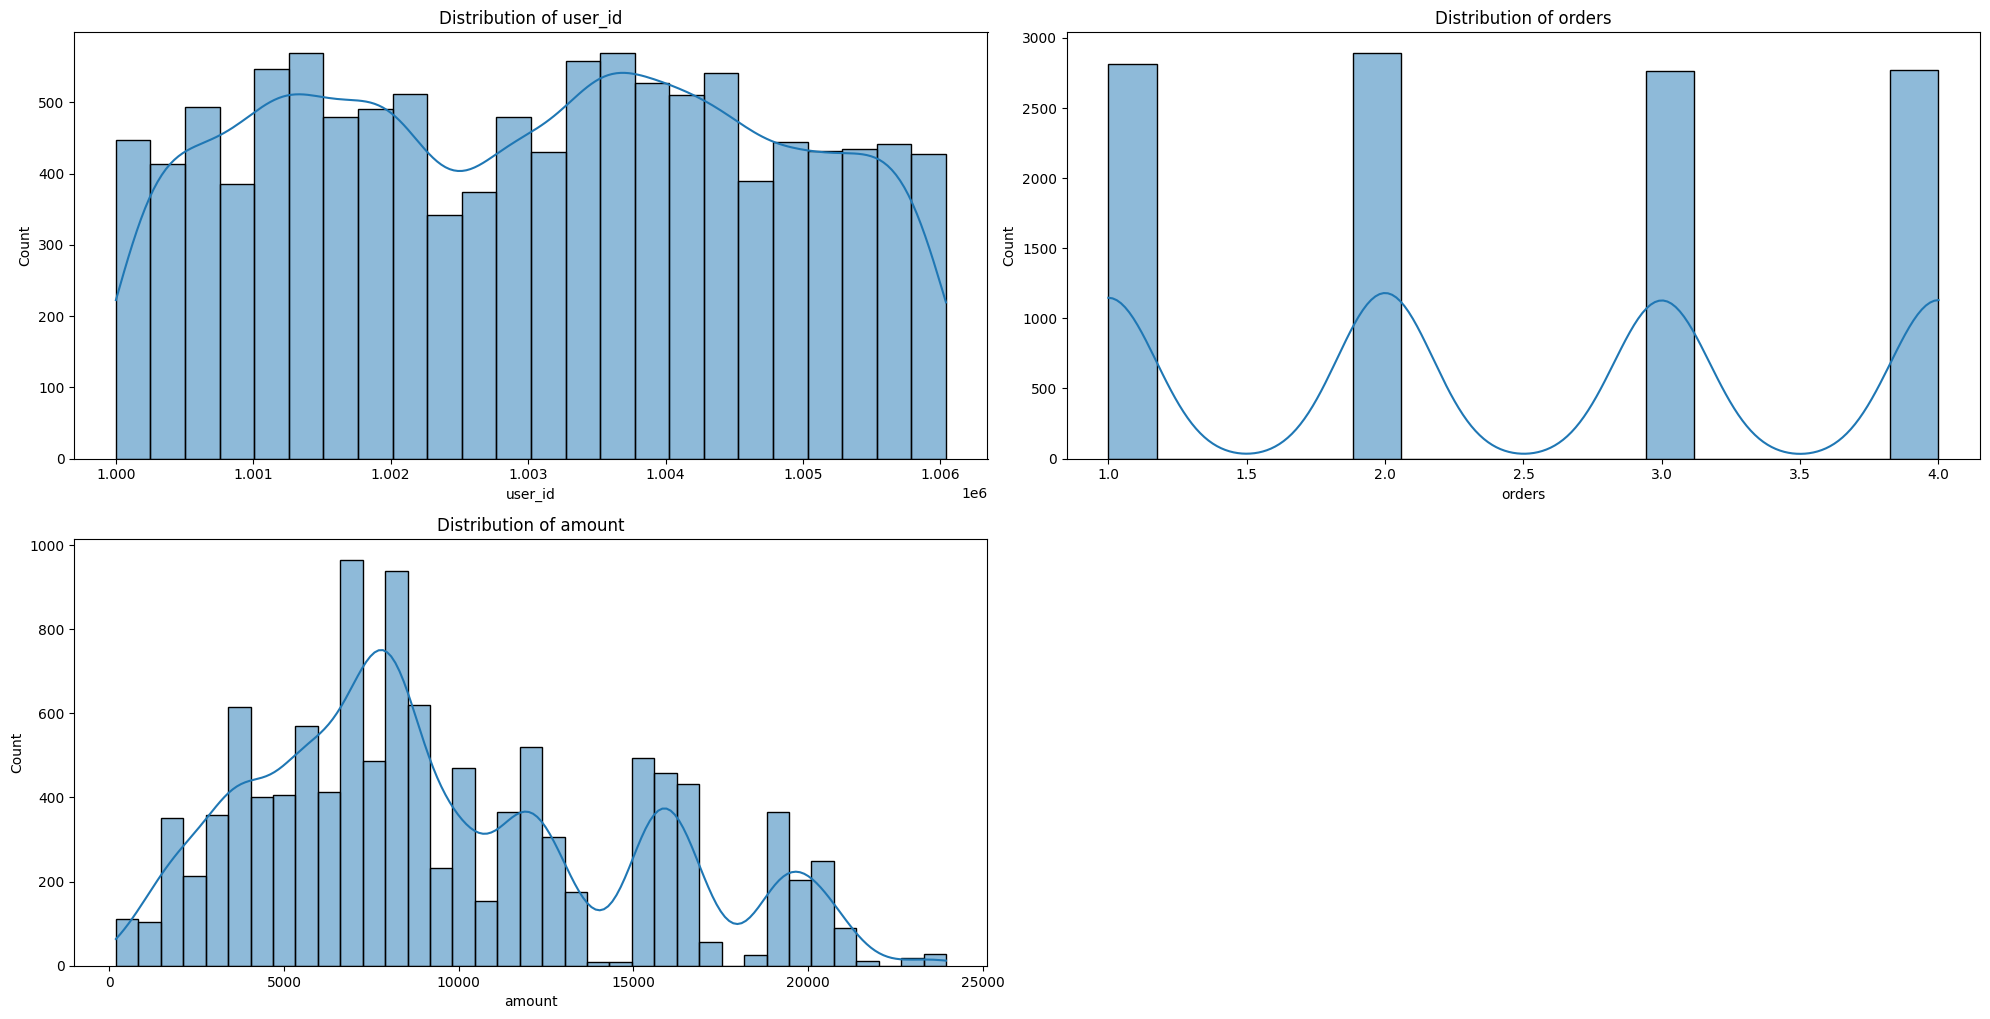

In [18]:
n_Cols = df.select_dtypes("number")

plt.figure(figsize=(20,20))
for e,i in enumerate(n_Cols):
    plt.subplot(4,2,e+1)
    plt.title(f"Distribution of {i}")
    sns.histplot(df[i], kde= True)
    plt.tight_layout();
plt.show();

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



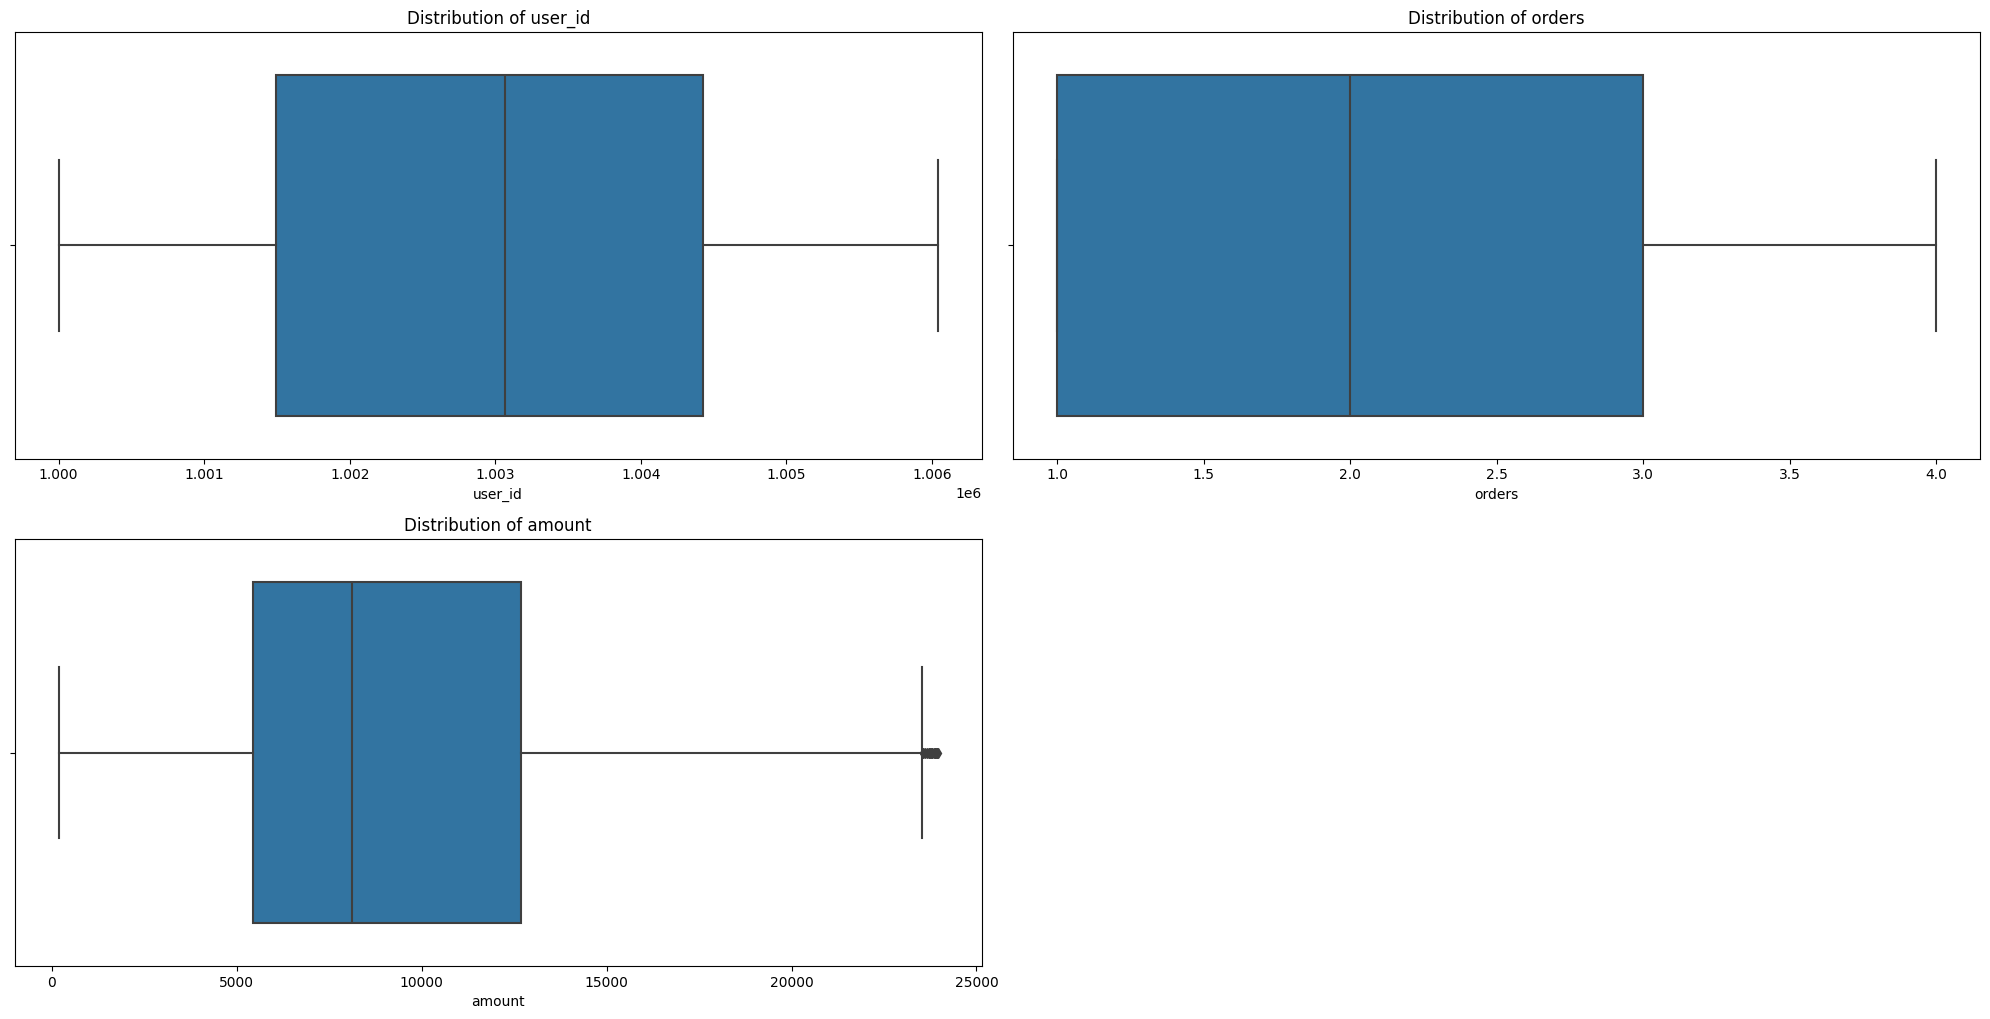

In [19]:
n_Cols = df.select_dtypes("number")

plt.figure(figsize=(20,20))
for e,i in enumerate(n_Cols):
    plt.subplot(4,2,e+1)
    plt.title(f"Distribution of {i}")
    sns.boxplot(x=df[i],)
    plt.tight_layout();

In [20]:
px.box(data_frame=df, x= "amount")

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable Python-3.10.5 x64\App\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Mine\pros\Python\Portable

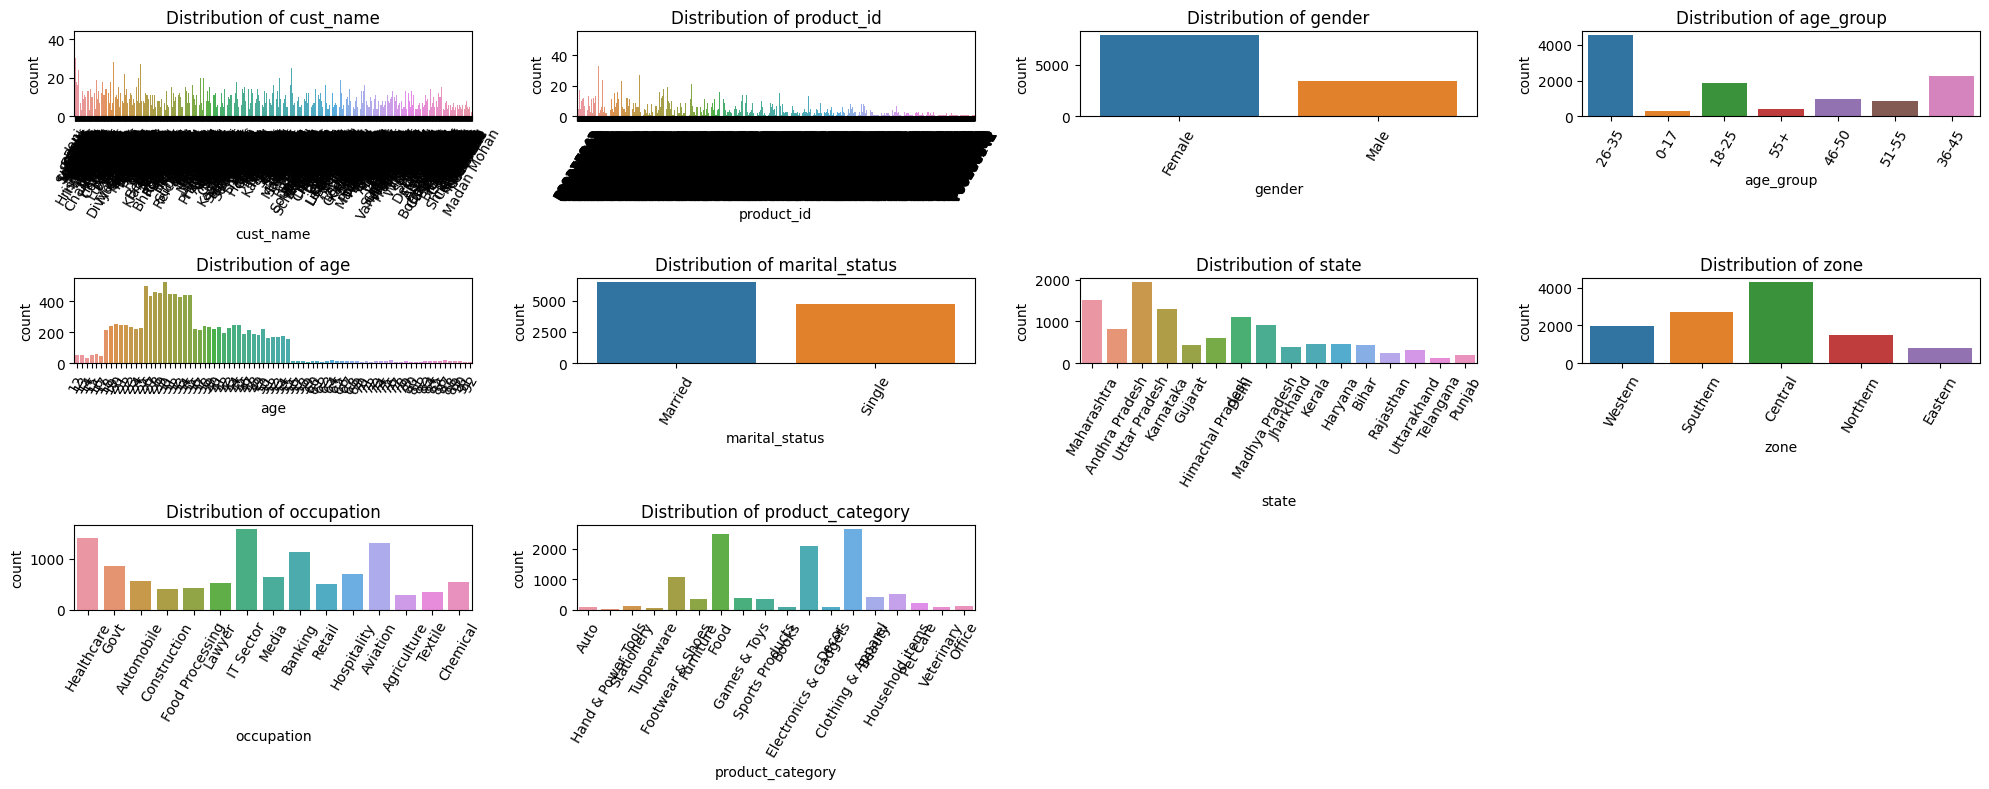

In [21]:
D_Cols = df.select_dtypes("object")

plt.figure(figsize=(20,8))
for e,i in enumerate(D_Cols):
    plt.subplot(3,4,e+1)
    plt.title(f"Distribution of {i}")
    sns.countplot(data=df, x=i)
    plt.xticks(rotation = 60)
    
    plt.tight_layout();

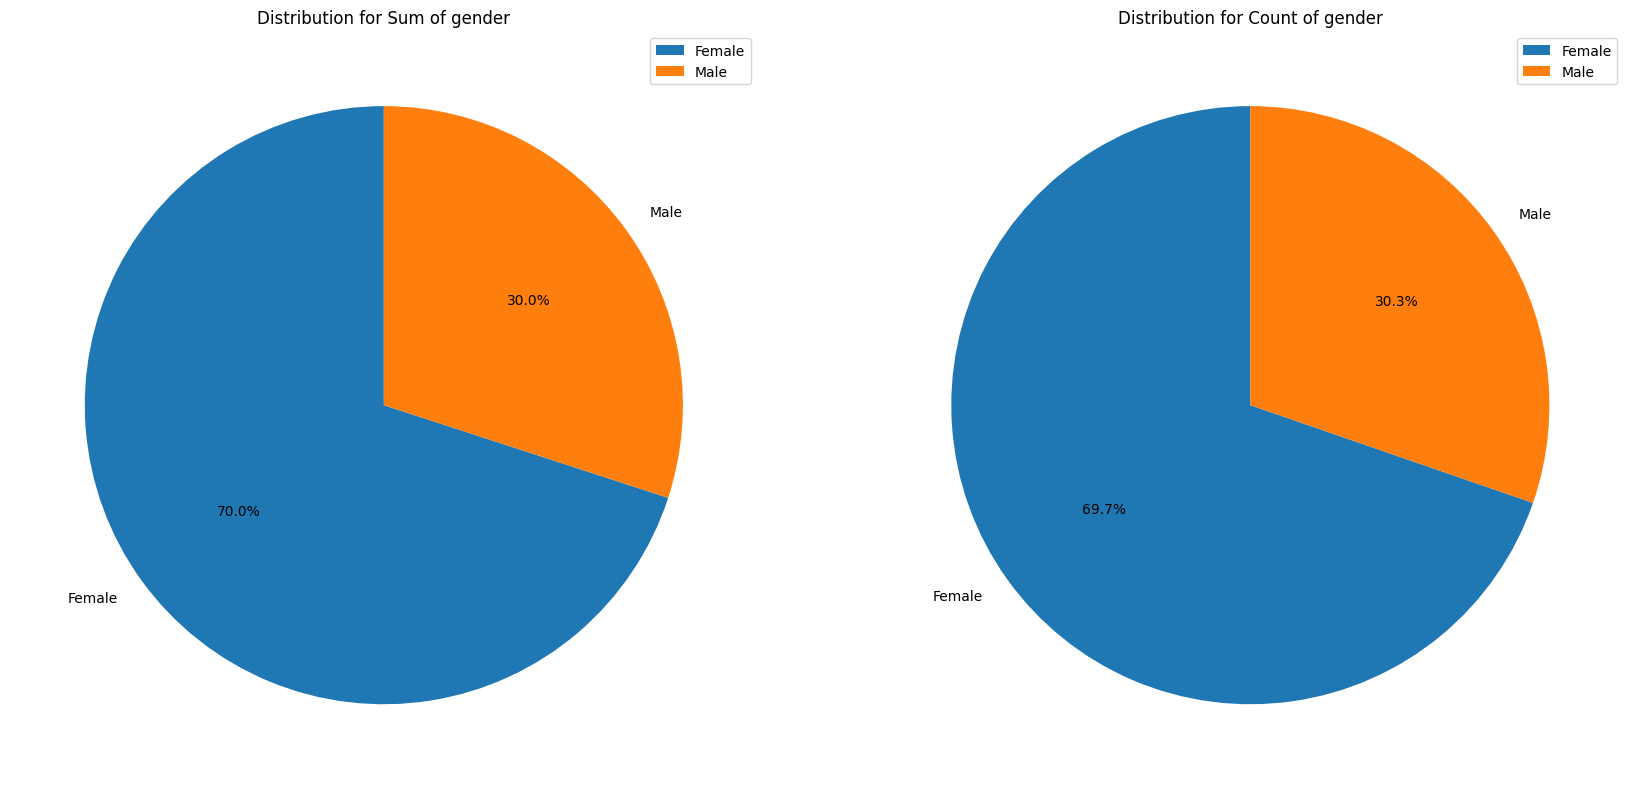

In [22]:

COL = "gender"
UNIV = df.groupby(COL)
Func = ["Sum", "Count"]
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution for {Func[e]} of {COL}")
    plt.pie( x=i, labels = UNIV[COL].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    # plt.xticks(rotation = 60)
    
    plt.tight_layout();

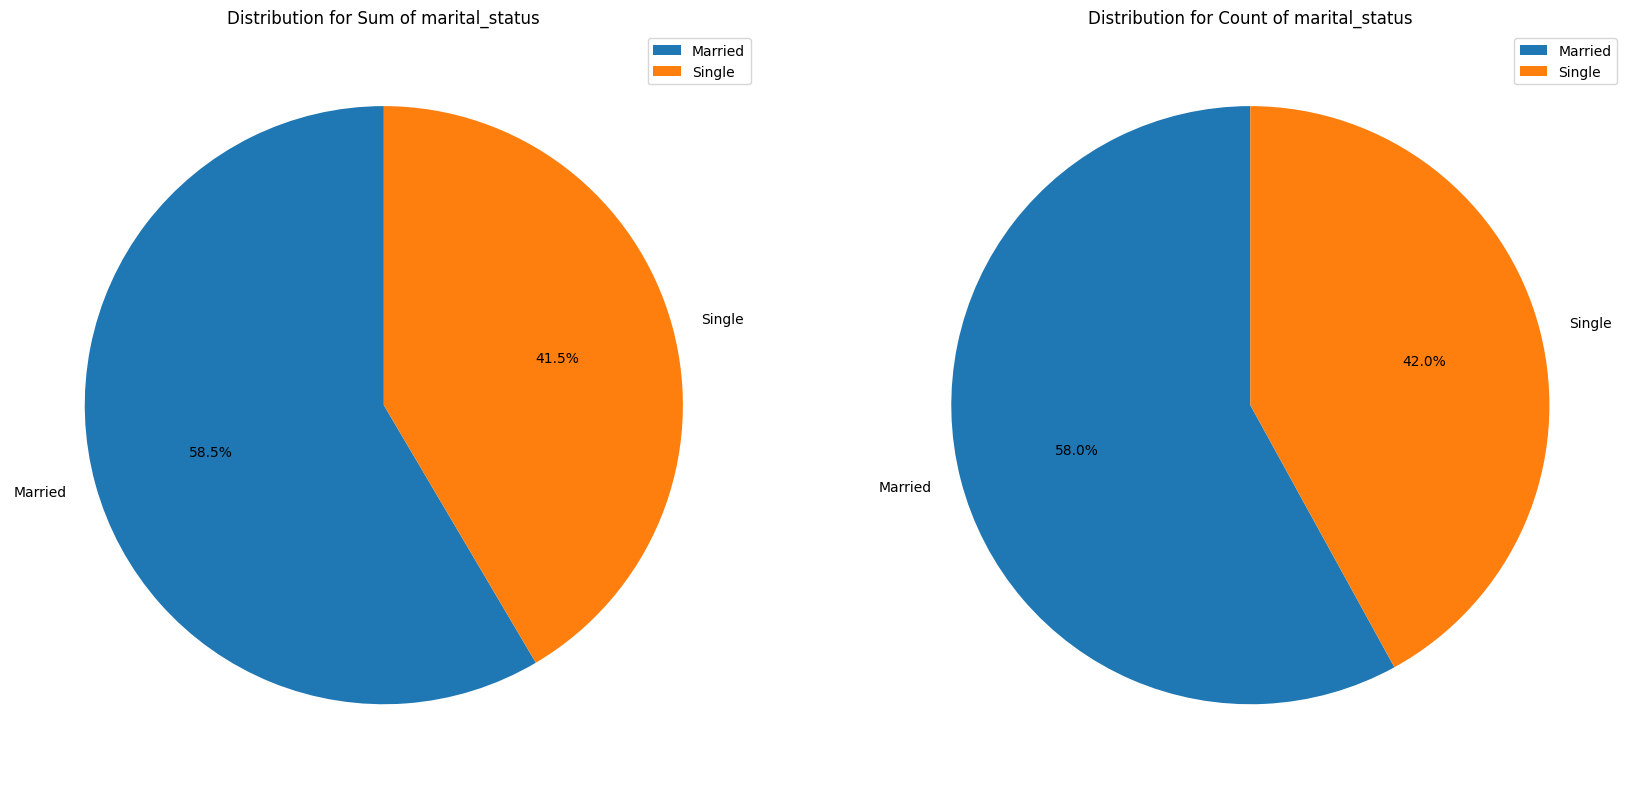

In [23]:

COL = "marital_status"
UNIV = df.groupby(COL)
Func = ["Sum", "Count"]
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution for {Func[e]} of {COL}")
    plt.pie( x=i, labels = UNIV[COL].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    # plt.xticks(rotation = 60)
    
    plt.tight_layout();

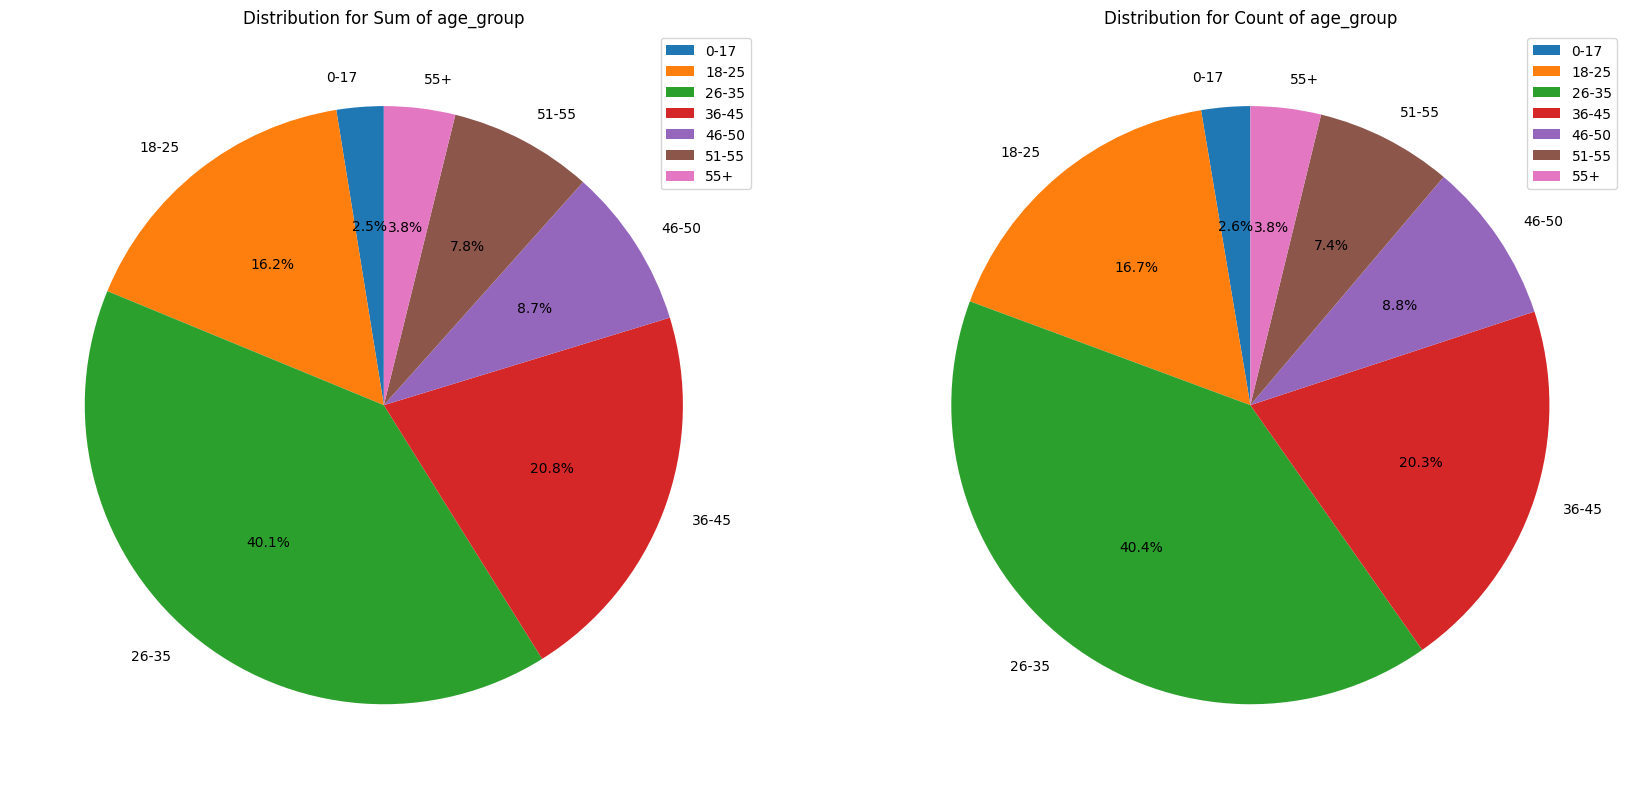

In [24]:
COL = "age_group"
UNIV = df.groupby(COL)
Func = ["Sum", "Count"]
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution for {Func[e]} of {COL}")
    plt.pie( x=i, labels = UNIV[COL].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    # plt.xticks(rotation = 60)
    
    plt.tight_layout();

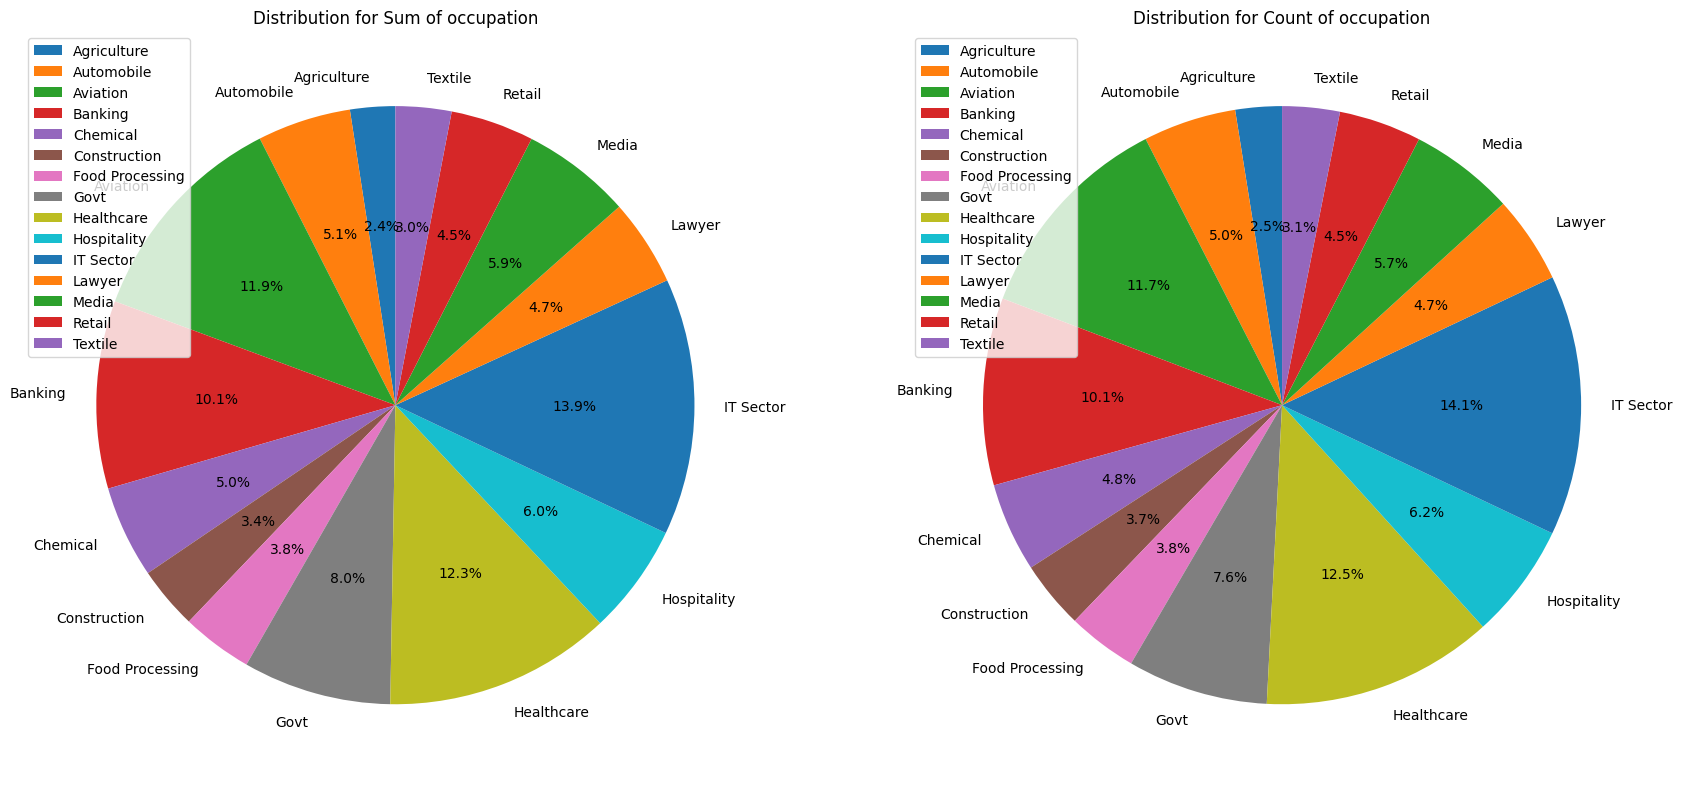

In [25]:

COL = "occupation"
UNIV = df.groupby(COL)
Func = ["Sum", "Count"]
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution for {Func[e]} of {COL}")
    plt.pie( x=i, labels = UNIV[COL].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    # plt.xticks(rotation = 60)
    
    plt.tight_layout();

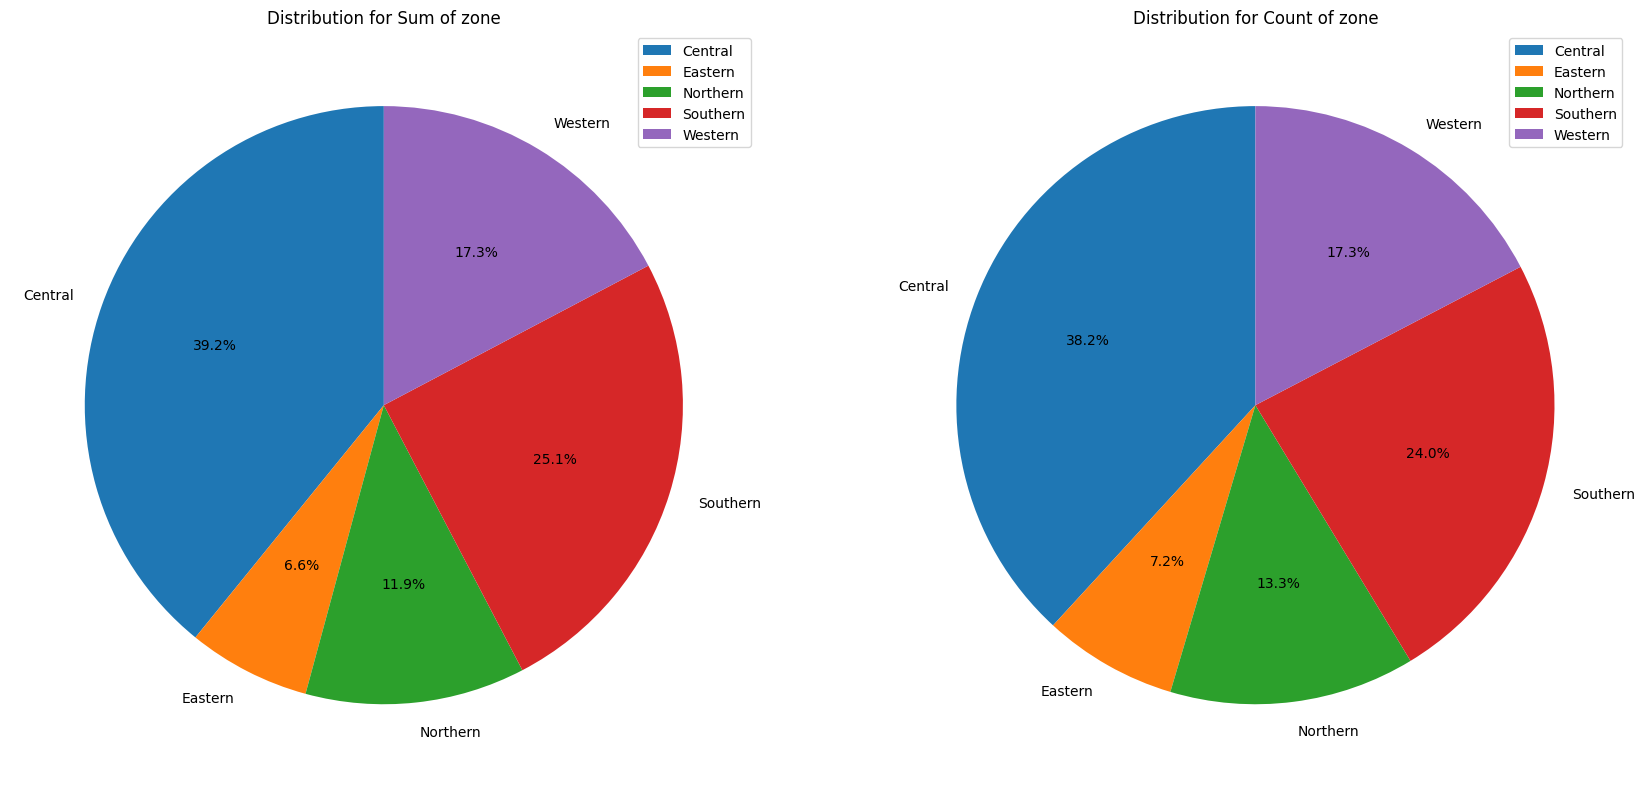

In [26]:
COL = "zone"
UNIV = df.groupby(COL)
Func = ["Sum", "Count"]
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution for {Func[e]} of {COL}")
    plt.pie( x=i, labels = UNIV[COL].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    # plt.xticks(rotation = 60)
    
    plt.tight_layout();

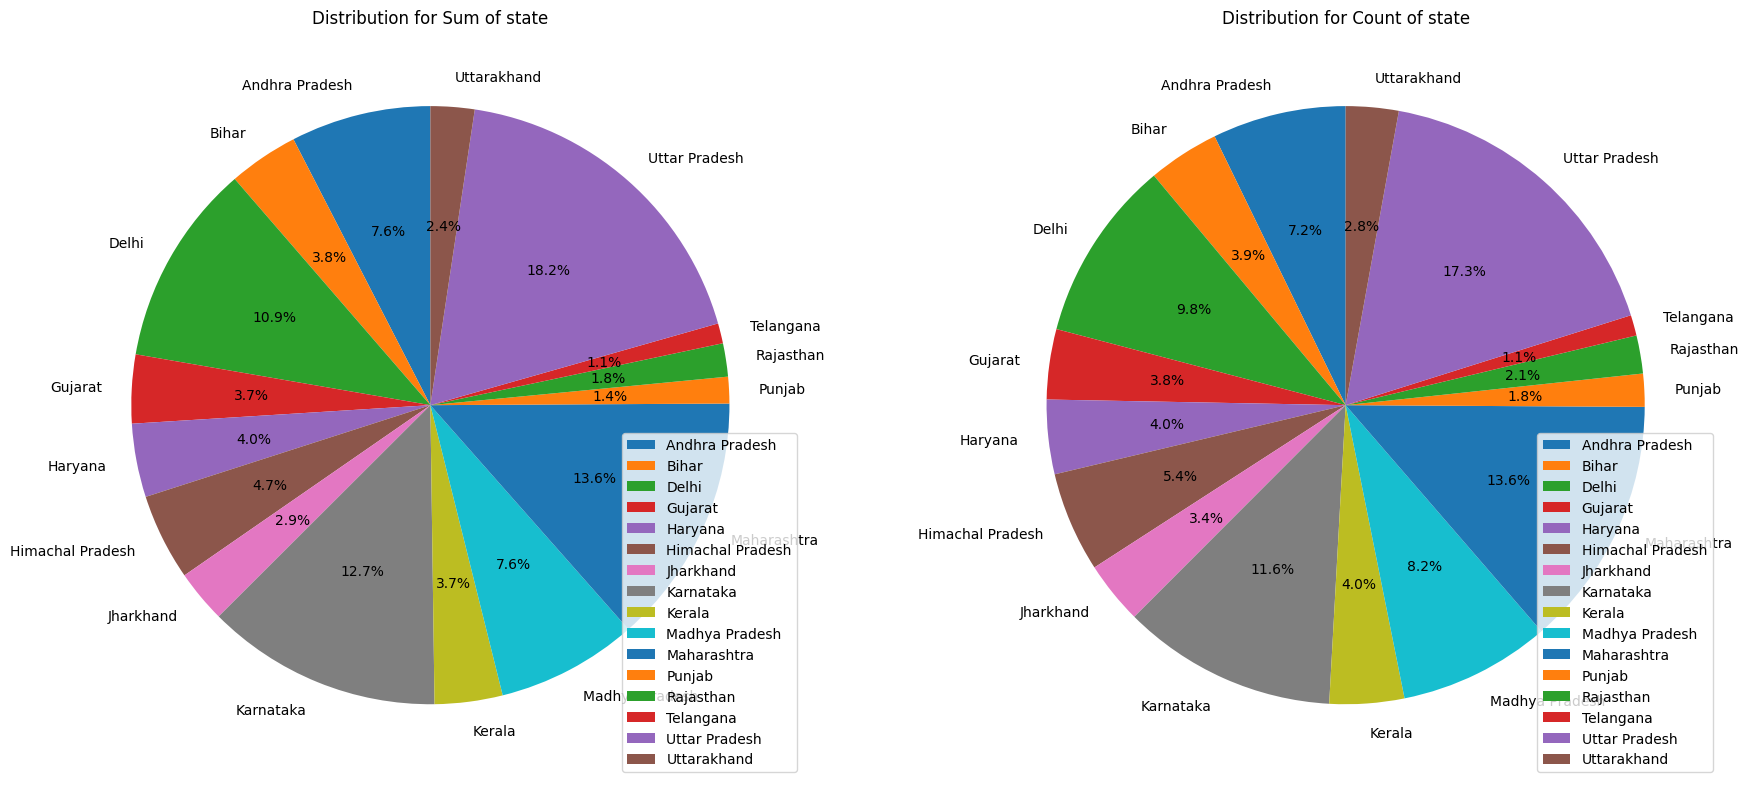

In [27]:
COL = "state"
UNIV = df.groupby(COL)
Title = ["Sum", "Count"]
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution for {Title[e]} of {COL}")
    plt.pie( x=i, labels = UNIV[COL].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    # plt.xticks(rotation = 60)
    
    plt.tight_layout();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


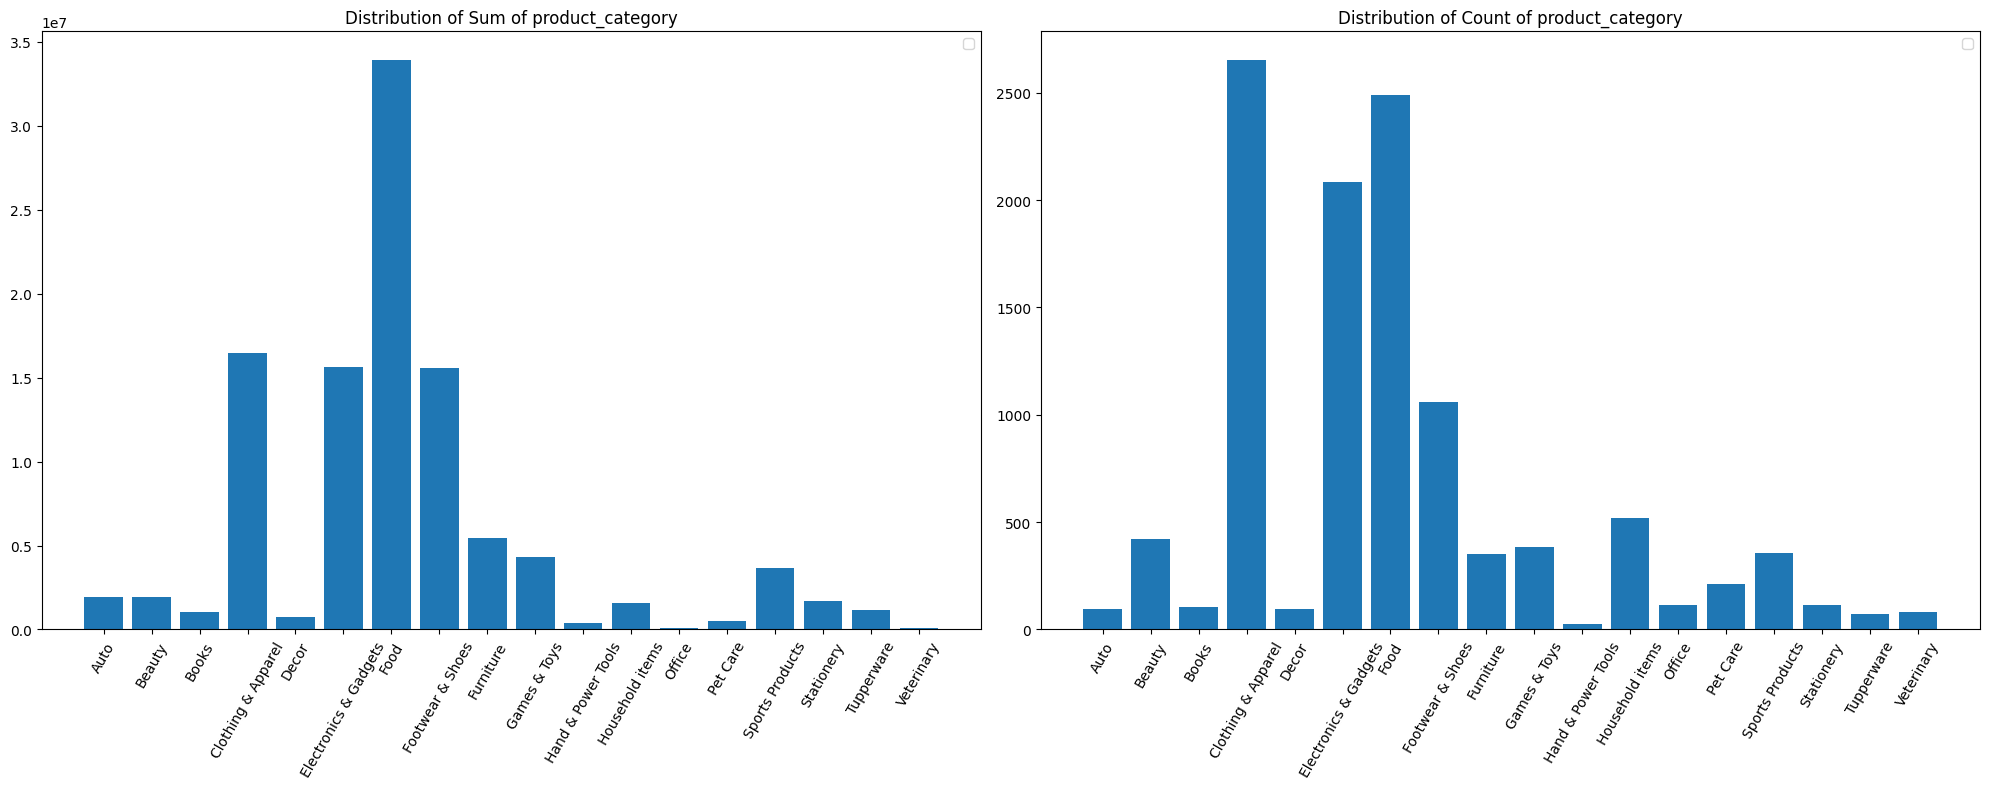

In [43]:
COL = "product_category"
UNIV = df.groupby(COL)
Func = ["Sum", "Count"]
# UNIV = UNIV.sort_values('amount', ascending=False)
UNIV1 = [UNIV["amount"].sum(),UNIV["amount"].count()]

plt.figure(figsize=(20,8))
for e,i in enumerate(UNIV1):
    plt.subplot(1,2,e+1)
    plt.title(f"Distribution of {Func[e]} of {COL}")
    plt.bar(x=UNIV[COL].value_counts().index, height= i)
    
    
    # plt.pie( x=i, labels = UNIV["product_category"].value_counts().index ,autopct='%1.1f%%',startangle=90)
    plt.legend();
    plt.xticks(rotation = 60)
    
    plt.tight_layout();

#### BI-Variate

In [29]:
BV1 = df.groupby(["zone","state"],as_index=False)["amount"].sum()
BV1 = BV1.sort_values('amount', ascending=False)
px.bar(data_frame= BV1, x= "zone",y= "amount",color="state",barmode='group')

In [30]:
px.scatter(data_frame=BV1, x="zone", y= "amount", color="state",size= "amount")

In [31]:
BV1 = df.groupby(["gender","marital_status"],as_index=False)["amount"].sum()
BV1 = BV1.sort_values('amount', ascending=False)
px.bar(data_frame= BV1, x= "gender",y= "amount",color="marital_status",barmode='group')

#### Multi-Variate

In [32]:
MV1 = df.groupby(["product_category","gender","marital_status"],as_index=False)["amount"].sum()
MV1 = MV1.sort_values('amount', ascending=False)
px.bar(data_frame= MV1, x= "product_category",y= "amount",color="marital_status",hover_data=["gender"],barmode="group")


In [33]:
MV1 = df.groupby(["product_category","occupation","marital_status","gender"],as_index=False)["amount"].sum()
MV1 = MV1.sort_values('amount', ascending=False)


px.bar(data_frame= MV1, x= "product_category",y= "amount",color="occupation",hover_data=["marital_status","gender"],barmode="group")

In [34]:
MV1 = df.groupby(["product_category","state","zone"],as_index=False)["amount"].sum()
MV1 = MV1.sort_values('amount', ascending=False)
px.bar(data_frame= MV1, x= "product_category",y= "amount",color="state",hover_data=["zone"],barmode='group')

In [35]:
MV1 = df.groupby(["product_category","age","age_group"],as_index=False)["amount"].sum()
MV1 = MV1.sort_values('amount', ascending=False)
px.bar(data_frame= MV1, x= "product_category",y= "amount",color="age_group",hover_data=["age"],barmode='group')